In [1]:
import pennylane as qml
import tensorflow as tf
import sklearn.datasets
from sklearn.datasets import fetch_openml

import numpy as np

from matplotlib import pyplot as plt

tf.keras.backend.set_floatx('float64')

## Load and reduce the data

Load the MNIST data and check number of training and test examples

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0  # add colour dimension

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


Create a function to filter out only 3 and 6

In [3]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [4]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


Plot the original images

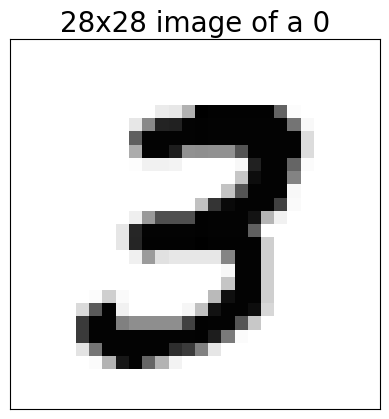

In [5]:
plt.imshow(x_train[0, :, :, 0], cmap='Greys')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("28x28 image of a 0", fontsize=20)
# save to file as pdf
plt.savefig('28x28_MNIST_0.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

Reduce images to 3x3

In [6]:
# x_train_small = tf.image.resize(x_train, (3,3)).numpy()
# x_test_small = tf.image.resize(x_test, (3,3)).numpy()

In [7]:
# plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1, cmap='Greys')
# ax = plt.gca()
# ax.set_xticks([])
# ax.set_yticks([])
# plt.title("9x9 image of a 0", fontsize=20)
# # save to file as pdf
# plt.savefig('9x9_MNIST_0.pdf', bbox_inches='tight', pad_inches=0)
# plt.show()

Flatten 28x28 to 784x1

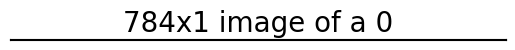

In [8]:
# x_train_small = x_train_small[:,4,:,:].reshape((-1,9))  # take only central slices
# x_test_small = x_test_small[:,4,:,:].reshape((-1,9))  # take only central slices

x_train_small = x_train.reshape((-1,784))  
x_test_small = x_test.reshape((-1,784))  

plt.imshow(x_train_small[0,:].reshape((1,-1)), vmin=0, vmax=1, cmap='Greys')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.title("784x1 image of a 0", fontsize=20)
# save to file as pdf
plt.savefig('784x1_MNIST_0.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


In [22]:
x_train_small[0].shape

(784,)

In [23]:
print(len(x_train_small[0]))
x_test_small.shape


784


(1968, 784)

In [24]:
x_test_small[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
len(x_train_small[0,:])


784

In [12]:
# x_train_small_amplitude_encoded = qml.AmplitudeEmbedding(x_train_small, wires=range(10), pad_with=0.0, normalize=True)  # for pennylane 0.11.0
# print(x_train_small_amplitude_encoded.parameters)
# print(len(x_train_small_amplitude_encoded.parameters[0]))
# len(x_train_small_amplitude_encoded.parameters[0][0])

In [13]:
# x_test_small_amplitude_encoded = qml.AmplitudeEmbedding(x_test_small, wires=range(10), pad_with=0.0, normalize=True)  # for pennylane 0.11.0
# print(x_test_small_amplitude_encoded.parameters)
# print(len(x_test_small_amplitude_encoded.parameters[0]))
# len(x_test_small_amplitude_encoded.parameters[0][0])

In [14]:
np.max(x_train_small[0,:])

1.0

In [15]:
np.sum((x_train_small[0,:]/np.sqrt(np.sum(x_train_small[0,:]**2)))**2)

1.0

In [26]:
x_train_small[0,:].reshape(1,-1).shape

(1, 784)

In [28]:
x_train_small[0,:].reshape(1,-1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
x_train_small[0,:].shape

(784,)

In [18]:
range(10)

range(0, 10)

## Set up the Quantum Neural Network

Create quantum circuit using pennylane qnode, then conver this to a Keras layer to make a Keras model

In [19]:
n_qubits = 9
n_layers = 1
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, diff_method="adjoint")
def qnode(inputs, weights):
    
    qml.AmplitudeEmbedding(features=inputs, wires=range(10),normalize=True,pad_with=0)  
    # for ii in range(n_qubits):
        # qml.RY(np.pi * inputs[ii], wires=ii)

        
    for jj in range(n_layers):
        for ii in range(n_qubits-1):
            qml.RZ(weights[jj,2*ii,0], wires=0)
            qml.RY(weights[jj,2*ii,1], wires=0)
            qml.RZ(weights[jj,2*ii,2], wires=0)

            qml.RZ(weights[jj,2*ii+1,0], wires=ii+1)
            qml.RY(weights[jj,2*ii+1,1], wires=ii+1)
            qml.RZ(weights[jj,2*ii+1,2], wires=ii+1)

            #qml.U3(*list(weights[jj,2*ii,:]), wires=0)
            #qml.U3(*list(weights[jj,2*ii+1,:]), wires=ii+1)
            qml.CNOT(wires=[ii+1,0])
            
        qml.RZ(weights[jj,2*(n_qubits-1),0], wires=0)
        qml.RY(weights[jj,2*(n_qubits-1),1], wires=0)
        qml.RZ(weights[jj,2*(n_qubits-1),2], wires=0)

    return qml.expval(qml.PauliZ(0))

weight_shapes = {"weights": (n_layers, 2*(n_qubits-1)+1, 3) }


qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=1, name="quantumLayer")
inputs = tf.keras.Input(shape=(784,), name="inputs")

outputs = qlayer(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="QNN")

# testImage = x_train_small[1,:]  /np.sqrt(np.sum(x_train_small[1,:]**2))
# print(testImage)
model.predict(x_train_small[0,:].reshape(1,-1))
print(model.summary())

1/1 [==============================] - 0s 271ms/step
Model: "QNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 784)]             0         
                                                                 
 quantumLayer (KerasLayer)   (None, 1)                 57        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


Redefine the classification values to match the Hinge loss

In [31]:
y_train_hinge = 2.0*y_train-1.0
y_test_hinge = 2.0*y_test-1.0

Define the hinge accuracy

In [32]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

## Compile and train the model

Compile the model using the hinge loss and accuracy and the Adam optimiser

In [33]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [34]:
print(model.summary())

Model: "QNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 784)]             0         
                                                                 
 quantumLayer (KerasLayer)   (None, 1)                 57        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


Train the model over 20 epochs

In [38]:
EPOCHS = 20
BATCH_SIZE = 32

NUM_EXAMPLES = 512 #x_train_small.shape[0]
print(NUM_EXAMPLES)

x_train_sub = x_train_small[:NUM_EXAMPLES,:]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

x_test_sub = x_test_small[:,:]
y_test_sub = y_test[:]

qnn_history_1layer = model.fit(
      x_train_sub, y_train_hinge_sub,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_sub, y_test_sub))

qnn_results_1layer = model.evaluate(x_test_sub, y_test_sub)

512
Epoch 1/20
16/16 [==============================] - 101s 6s/step - loss: 1.0044 - hinge_accuracy: 0.4414 - val_loss: 1.0026 - val_hinge_accuracy: 0.4587
Epoch 2/20
16/16 [==============================] - 108s 7s/step - loss: 1.0033 - hinge_accuracy: 0.4453 - val_loss: 1.0018 - val_hinge_accuracy: 0.4738
Epoch 3/20
16/16 [==============================] - 100s 6s/step - loss: 1.0022 - hinge_accuracy: 0.4570 - val_loss: 1.0009 - val_hinge_accuracy: 0.4899
Epoch 4/20
16/16 [==============================] - 116s 8s/step - loss: 1.0011 - hinge_accuracy: 0.4746 - val_loss: 1.0000 - val_hinge_accuracy: 0.5025
Epoch 5/20
16/16 [==============================] - 135s 9s/step - loss: 0.9999 - hinge_accuracy: 0.4941 - val_loss: 0.9991 - val_hinge_accuracy: 0.5166
Epoch 6/20
16/16 [==============================] - 128s 8s/step - loss: 0.9987 - hinge_accuracy: 0.5156 - val_loss: 0.9980 - val_hinge_accuracy: 0.5292
Epoch 7/20
16/16 [==============================] - 131s 8s/step - loss: 0.997

In [42]:
qnn_history_1layer.history

{'loss': [1.004409705272598,
  1.0032886756188792,
  1.0021600469578005,
  1.001076920294305,
  0.9999170290270583,
  0.9986699472477788,
  0.9972823361987804,
  0.9956034711325031,
  0.9936620762124166,
  0.9912829145356873,
  0.9882711927589484,
  0.9847859351434506,
  0.9806559193061809,
  0.9759030747458758,
  0.9705407325567663,
  0.9645502787457241,
  0.9583170871585145,
  0.9515678646171704,
  0.9446537112724052,
  0.937824892655233],
 'hinge_accuracy': [0.44140625,
  0.4453125,
  0.45703125,
  0.474609375,
  0.494140625,
  0.515625,
  0.544921875,
  0.568359375,
  0.6015625,
  0.634765625,
  0.669921875,
  0.71484375,
  0.75390625,
  0.80078125,
  0.82421875,
  0.849609375,
  0.8828125,
  0.890625,
  0.896484375,
  0.904296875],
 'val_loss': [1.002605521035271,
  1.0017558787226502,
  1.0009206551285064,
  1.0000341811532476,
  0.9990987862554529,
  0.9980154484003643,
  0.9966983837559384,
  0.9951534403779873,
  0.9931841100199977,
  0.9906973598531996,
  0.9877893586956417,


Create and train a 2 layer version of the QNN

In [43]:
n_qubits = 10
n_layers = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, diff_method="adjoint")
def qnode(inputs, weights):

    qml.AmplitudeEmbedding(features=inputs, wires=range(10),normalize=True,pad_with=0)  

    # for ii in range(n_qubits):
    #     qml.RY(np.pi * inputs[ii], wires=ii)

    for jj in range(n_layers):
        for ii in range(n_qubits-1):
            qml.RZ(weights[jj,2*ii,0], wires=0)
            qml.RY(weights[jj,2*ii,1], wires=0)
            qml.RZ(weights[jj,2*ii,2], wires=0)

            qml.RZ(weights[jj,2*ii+1,0], wires=ii+1)
            qml.RY(weights[jj,2*ii+1,1], wires=ii+1)
            qml.RZ(weights[jj,2*ii+1,2], wires=ii+1)

            #qml.U3(*list(weights[jj,2*ii,:]), wires=0)
            #qml.U3(*list(weights[jj,2*ii+1,:]), wires=ii+1)
            qml.CNOT(wires=[ii+1,0])
            
        qml.RZ(weights[jj,2*(n_qubits-1),0], wires=0)
        qml.RY(weights[jj,2*(n_qubits-1),1], wires=0)
        qml.RZ(weights[jj,2*(n_qubits-1),2], wires=0)

    return qml.expval(qml.PauliZ(0))

weight_shapes = {"weights": (n_layers, 2*(n_qubits-1)+1, 3) }


qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=1, name="quantumLayer")
inputs = tf.keras.Input(shape=(784,), name="inputs")
outputs = qlayer(inputs)
model2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="QNN")

model2.predict(x_train_small[0,:].reshape(1,-1))
print(model2.summary())

1/1 [==============================] - 0s 97ms/step
Model: "QNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 784)]             0         
                                                                 
 quantumLayer (KerasLayer)   (None, 1)                 114       
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
model2.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [45]:
EPOCHS = 20
BATCH_SIZE = 32

NUM_EXAMPLES = 512 #x_train_small.shape[0]
print(NUM_EXAMPLES)

x_train_sub = x_train_small[:NUM_EXAMPLES,:]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

x_test_sub = x_test_small[:,:]
y_test_sub = y_test[:]

qnn_history_2layer = model2.fit(
      x_train_sub, y_train_hinge_sub,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_sub, y_test_sub))

qnn_results_2layer = model2.evaluate(x_test_sub, y_test_sub)

512
Epoch 1/20
16/16 [==============================] - 212s 14s/step - loss: 0.9919 - hinge_accuracy: 0.4902 - val_loss: 0.9878 - val_hinge_accuracy: 0.5116
Epoch 2/20
16/16 [==============================] - 205s 13s/step - loss: 0.9832 - hinge_accuracy: 0.4902 - val_loss: 0.9794 - val_hinge_accuracy: 0.5121
Epoch 3/20
16/16 [==============================] - 213s 14s/step - loss: 0.9732 - hinge_accuracy: 0.4922 - val_loss: 0.9708 - val_hinge_accuracy: 0.5131
Epoch 4/20
16/16 [==============================] - 221s 14s/step - loss: 0.9633 - hinge_accuracy: 0.4961 - val_loss: 0.9617 - val_hinge_accuracy: 0.5197
Epoch 5/20
16/16 [==============================] - 212s 14s/step - loss: 0.9530 - hinge_accuracy: 0.5078 - val_loss: 0.9521 - val_hinge_accuracy: 0.5307
Epoch 6/20
16/16 [==============================] - 217s 14s/step - loss: 0.9422 - hinge_accuracy: 0.5293 - val_loss: 0.9425 - val_hinge_accuracy: 0.5570
Epoch 7/20
16/16 [==============================] - 241s 16s/step - loss

In [46]:
qnn_history_2layer.history

{'loss': [0.9918835658423661,
  0.9831518684641459,
  0.9732395253532526,
  0.9633359900916635,
  0.9530492973159846,
  0.942243866326671,
  0.9315433380557576,
  0.9210791519461905,
  0.9111940418979739,
  0.9016074148175584,
  0.8928286390999405,
  0.8844707951543982,
  0.8764792389835535,
  0.868929488145401,
  0.861610599607113,
  0.8542287840877346,
  0.8474743937613779,
  0.8407677177049787,
  0.8346174946783933,
  0.828719607374954],
 'hinge_accuracy': [0.490234375,
  0.490234375,
  0.4921875,
  0.49609375,
  0.5078125,
  0.529296875,
  0.578125,
  0.673828125,
  0.763671875,
  0.8515625,
  0.892578125,
  0.935546875,
  0.94921875,
  0.955078125,
  0.95703125,
  0.9609375,
  0.95703125,
  0.95703125,
  0.955078125,
  0.955078125],
 'val_loss': [0.9877831963749255,
  0.9793629158322258,
  0.9708110863488494,
  0.9616685785706333,
  0.9521454472081826,
  0.9425446336314404,
  0.932881105408207,
  0.9234782224076815,
  0.9142218276240694,
  0.9056589503816221,
  0.8975083405467489,

## Plot the results!

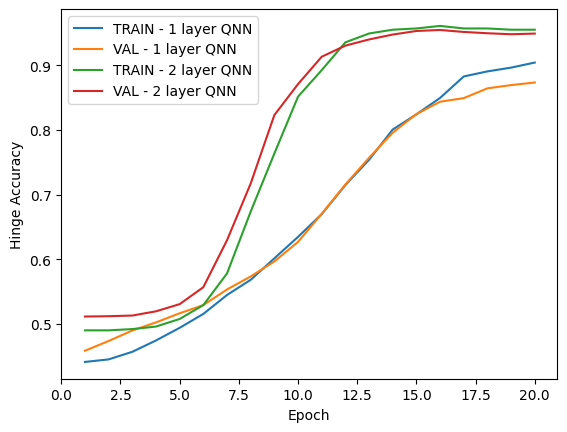

In [48]:
# plot the hinge accuracy for the qnn history for both 1 and 2 layer on the same axes
plt.plot(np.arange(1,21), qnn_history_1layer.history["hinge_accuracy"], label="TRAIN - 1 layer QNN")
plt.plot(np.arange(1,21), qnn_history_1layer.history["val_hinge_accuracy"], label="VAL - 1 layer QNN")
plt.plot(np.arange(1,21), qnn_history_2layer.history["hinge_accuracy"], label="TRAIN - 2 layer QNN")
plt.plot(np.arange(1,21), qnn_history_2layer.history["val_hinge_accuracy"], label="VAL - 2 layer QNN")
plt.xlabel("Epoch")
plt.ylabel("Hinge Accuracy")
plt.legend()
# modify x_ticks to also include 20
plt.xticks(np.arange(0, 21, 2.5))
# save as pdf with tight layout and no padding
plt.savefig("qnn_hinge_accuracy.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

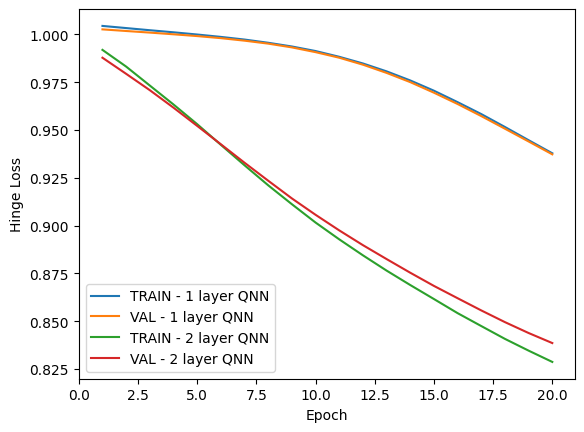

In [49]:
# plot the hinge accuracy for the loss for both 1 and 2 layer on the same axes
plt.plot(np.arange(1,21), qnn_history_1layer.history["loss"], label="TRAIN - 1 layer QNN")
plt.plot(np.arange(1,21), qnn_history_1layer.history["val_loss"], label="VAL - 1 layer QNN")
plt.plot(np.arange(1,21), qnn_history_2layer.history["loss"], label="TRAIN - 2 layer QNN")
plt.plot(np.arange(1,21), qnn_history_2layer.history["val_loss"], label="VAL - 2 layer QNN")
plt.xlabel("Epoch")
plt.ylabel("Hinge Loss")
plt.legend()
# modify x_ticks to also include 20
plt.xticks(np.arange(0, 21, 2.5))
# save as pdf with tight layout and no padding
plt.savefig("qnn_hinge_loss.pdf", bbox_inches="tight", pad_inches=0)
plt.show()